In [17]:
import numpy as np
import matplotlib.pyplot as plt

inp = np.array([[0,1,0],[0,1,1],[0,0,0],[1,0,0],[1,1,1],[1,0,1]])
out = np.array([[0],[0],[0],[0],[0],[0]])

In [44]:
class NeuralNetwork:
    
    def __init__(self,inp,out):
        self.inp=inp
        self.out=out
        self.weights = np.array([[0.50],[0.50],[0.50]])
        self.err=[]
        self.ep=[]
        
    def sigmoid(self,x,deriv=False):
        if(deriv==True):
            return x*(1-x)
        return 1/(1+np.exp(-x))
    
    def forwardprop(self):
        self.hidden = self.sigmoid(np.dot(self.inp,self.weights))
    
    def backprop(self):
        self.error = self.out-self.hidden
        change = self.error * self.sigmoid(self.hidden,deriv=True)
        self.weights+= np.dot(self.inp.T, change)
        
    def train(self, epochs=20000):
        for epoch in range(epochs):
            self.forwardprop()
            self.backprop()
            self.err.append(np.average(np.abs(self.error)))
            self.ep.append(epoch)
            
    def predict(self,inp1):
        pre = self.sigmoid(np.dot(inp1,self.weights))
        return pre
    
        

In [45]:
NN = NeuralNetwork(inp,out)
NN.train()
ex=np.array([[1,1,0]])
ex1=np.array([[0,1,1]])

print(NN.predict(ex), ' -value ',ex[0][0])
print(NN.predict(ex1), ' -value ',ex1[0][0])

[[2.45757259e-05]]  -value  1
[[0.00101565]]  -value  0


Text(0, 0.5, 'Loss')

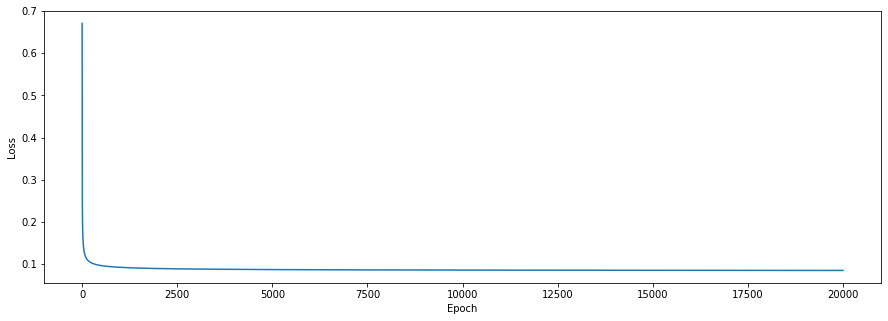

In [48]:
plt.figure(figsize=(15,5))
plt.plot(NN.ep,NN.err)
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [49]:
#THE END